In [2]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [6]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [8]:
model=cv2.dnn_DetectionModel(frozen_model, config_file)

In [10]:
classLabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [12]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [14]:
print(len(classLabels))

80


In [16]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000278A72ADF70>

In [18]:
img=cv2.imread('imgpep.jpg')

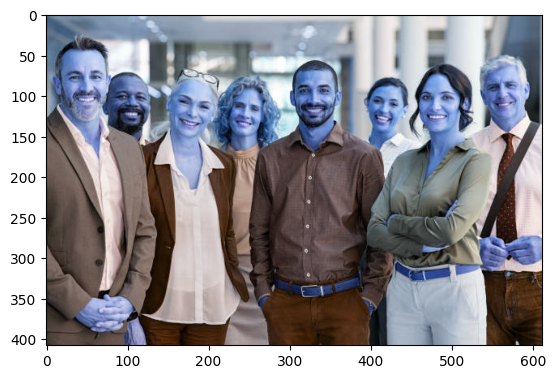

In [20]:
plt.imshow(img)

In [22]:
ClassIndex, confidece, bbox= model.detect(img, confThreshold=0.5)

In [24]:
print(ClassIndex)

[ 1  1  1  1  1  1  1 32]


In [26]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

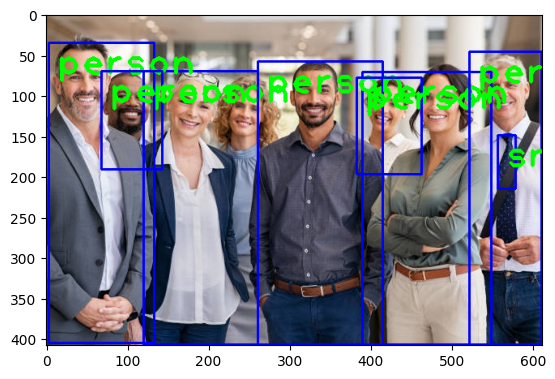

In [28]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [30]:
# for video analysis

cap=cv2.VideoCapture('854204-hd_1920_1080_30fps.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the video")
font_scale = 3 
font = cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)

        cv2.imshow('object detection',frame)

        if cv2.waitKey(2) & 0xff==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


[1 1 1]
[1 1 1 3]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 3]
[1]
[1]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3]
[1 3 1]
[1 3 1]
[1 1 3 3]
[1 3 1 3]
[3 1 1 3]
[3 3 3 1]
[1 3 3]
[3 1]
[1 3]
[1 3]
[1 3]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3 1]
[3]
[3]
[3]
[3]
[3]
[3 3]
[3 1]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3 1]
[3 1 1 3]
[3 1 3]
[3 1 3 1]
[3 1 3 1]
[3 1 3 1]
[3 1 3]
[3 1 3 1]
[3 3 1]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[3 1 3]
[1 3 1 3]
[3 1 3 1]
[3 3 1]
[1 3 1]
[1 3 1]
[1 3]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1]
[1 3]
[3 1]
[1 3]
[1]
[1]
[1 3]
[1 3]
[1]
[1 3]
[1 6 3]
[6 1 3]
[1 3 8]
[8]
[8 1]
[8]
[8]
[8 3]
[8 3]
[8 6 3]
[8 3]
[ 8 28  6  3]
[ 6 28  8  3]
[ 6  8  1  3 28]
[ 8  1  6  3 28 28]
[ 1  8 28  3]
[ 8  1 28  3]
[ 1  8 28  3]
[ 1  8 28  3]
[ 1 28  8  6  3]
[ 1 28  6  8  3]
[ 1  8 28  6]
[ 1 28  6  8]
[ 1  8 28]
[ 1 28  6]
[ 1 28  8]
[ 1 28  8]
[ 1 28  8]
[ 1 28  8]
[ 1 28  8]
[ 1  8 28]
[28  8  1]
[28  1  8]
[28  

In [32]:
# for webcam analysis

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the video")
font_scale = 3 
font = cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)

        cv2.imshow('object detection',frame)

        if cv2.waitKey(2) & 0xff==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[77]
[1]
[77  1]
[77]
[77]
[77  1  1]
[77  1]
[77]
[77]
[77]
[77 75]
[77]
[77  1]
[77  1  1]
[77  1]
[77  1  1]
[77  1  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1 75]
[77  1]
[77  1]
[77  1  1]
[77  1  1]
[ 1 77 75]
[77  1]
[77  1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
